In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.gridspec import GridSpec
import seaborn as sns
from scipy import stats
import math
import sklearn.metrics as skm

sns.set()
style.use('fivethirtyeight')
pd.options.mode.chained_assignment = None

In [2]:
data = pd.read_csv('data.csv')
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [3]:
def remove_outliers(data, x):
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed.\n")
    return data

<AxesSubplot:>

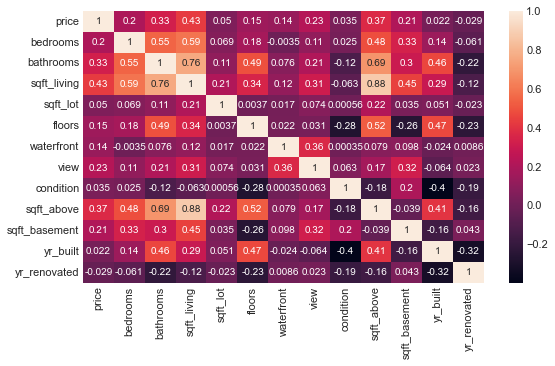

In [4]:
from matplotlib.pyplot import figure
figure(figsize=(8, 5))

# Creating a correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)

Outliers of price are removed.

Outliers of sqft_living are removed.

Outliers of sqft_above are removed.

Outliers of sqft_basement are removed.



((array([-3.32685501, -3.07120699, -2.92913322, ...,  2.92913322,
          3.07120699,  3.32685501]),
  array([  20,   50,   60, ..., 1380, 1380, 1380], dtype=int64)),
 (308.7696401226832, 680.754752851711, 0.9932575219827825))

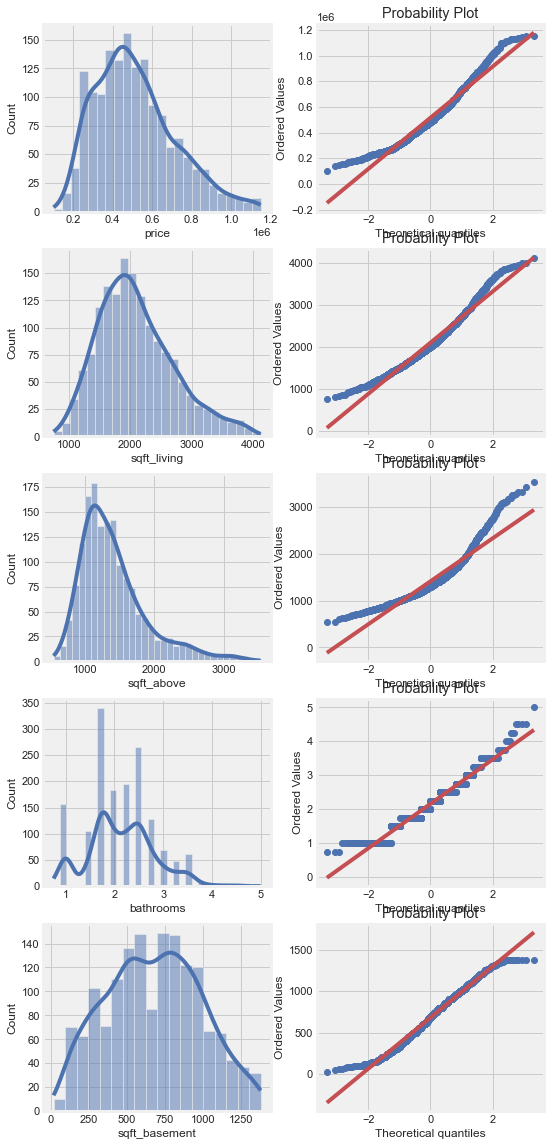

In [5]:
new_data=remove_outliers(data, 'price')
new_data=remove_outliers(new_data, 'sqft_living')
new_data=remove_outliers(new_data, 'sqft_above')
new_data=remove_outliers(new_data, 'sqft_basement')
fig = plt.figure(figsize=(8, 20))
grid = GridSpec(ncols=2, nrows=5, figure=fig)

# Histogram
ax1 = fig.add_subplot(grid[0,0])
sns.histplot(new_data['price'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[0, 1])
stats.probplot(new_data['price'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[1, 0])
sns.histplot(new_data['sqft_living'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[1,1])
stats.probplot(new_data['sqft_living'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[2, 0])
sns.histplot(new_data['sqft_above'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[2, 1])
stats.probplot(new_data['sqft_above'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[3, 0])
sns.histplot(new_data['bathrooms'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[3,1])
stats.probplot(new_data['bathrooms'], plot=ax2)

# Histogram
ax1 = fig.add_subplot(grid[4, 0])
sns.histplot(new_data['sqft_basement'], ax=ax1, kde=True)

# QQ plot
ax2 = fig.add_subplot(grid[4, 1])
stats.probplot(new_data['sqft_basement'], plot=ax2)


In [6]:
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1578.0,514871.247875,203068.015397,100000.00,367625.00,485000.00,629950.0,1150000.0
bedrooms,1578.0,3.471483,0.905565,1.00,3.00,3.00,4.0,9.0
bathrooms,1578.0,2.157795,0.666581,0.75,1.75,2.25,2.5,5.0
sqft_living,1578.0,2095.089354,618.651335,750.00,1650.00,2000.00,2460.0,4120.0
sqft_lot,1578.0,12217.764892,36310.328061,746.00,4611.00,7210.00,10000.0,1074218.0
floors,1578.0,1.286122,0.444487,1.00,1.00,1.00,1.5,3.0
waterfront,1578.0,0.003169,0.056219,0.00,0.00,0.00,0.0,1.0
view,1578.0,0.252852,0.741090,0.00,0.00,0.00,0.0,4.0
condition,1578.0,3.590621,0.731370,1.00,3.00,3.00,4.0,5.0
sqft_above,1578.0,1414.334601,485.380883,550.00,1080.00,1300.00,1610.0,3530.0


In [7]:
import random
data_1 = new_data.sample(100)
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
price,100.0,504411.288462,182377.870944,155000.0,374500.00,466750.000,615000.00,1003000.0
bedrooms,100.0,3.510000,1.068323,1.0,3.00,3.000,4.00,9.0
bathrooms,100.0,2.162500,0.657489,1.0,1.75,2.125,2.50,4.5
sqft_living,100.0,2089.860000,639.108091,998.0,1547.50,2005.000,2497.50,3850.0
sqft_lot,100.0,8857.870000,7893.579608,844.0,4677.75,7104.000,9833.25,49928.0
floors,100.0,1.270000,0.428882,1.0,1.00,1.000,1.50,2.5
waterfront,100.0,0.000000,0.000000,0.0,0.00,0.000,0.00,0.0
view,100.0,0.340000,0.945163,0.0,0.00,0.000,0.00,4.0
condition,100.0,3.590000,0.712018,2.0,3.00,3.500,4.00,5.0
sqft_above,100.0,1407.590000,493.117932,610.0,1060.00,1300.000,1642.50,3336.0


In [8]:
import numpy as np
from scipy import stats
mean = data_1['sqft_living'].mean()

print("Mean: {:.2f}".format(mean))

prop = np.sum(data_1['sqft_living'] > mean) / len(data_1['sqft_living'])
print("Greater than mean: {}".format(prop))

t, p = stats.ttest_1samp(data_1['sqft_living'], 0.1)
print("Test:  t = {:.2f}, p = {}".format(t, p))

ci = stats.t.interval(0.99, len(data_1['sqft_living'])-1, loc=mean, scale=stats.sem(data_1['sqft_living']))
print("99% CI for the mean: ({:.2f}, {:.2f})".format(ci[0], ci[1]))

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")


Mean: 2089.86
Greater than mean: 0.47
Test:  t = 32.70, p = 7.317579898734203e-55
99% CI for the mean: (1922.00, 2257.72)
Reject the null hypothesis.


In [9]:
from scipy.stats import ttest_ind

# performing t-tests for continuous variables
f_stat, p_value = stats.f_oneway(data_1['price'], data_1['sqft_living'],data_1['bathrooms'],data_1['sqft_above'],data_1['sqft_basement'])
print("Test:  t = {:.2f}, p = {}".format(f_stat, p_value))

Test:  t = 761.76, p = 6.378665909578808e-210


In [10]:
data_2 = new_data.sample(200)

mean = data_2['sqft_living'].mean()

print("Mean: {:.2f}".format(mean))

prop = np.sum(data_2['sqft_living'] > mean) / len(data_2['sqft_living'])
print("Greater than mean: {}".format(prop))

t, p = stats.ttest_1samp(data_2['sqft_living'], 0.1)
print("Test:  t = {:.2f}, p = {}".format(t, p))

ci = stats.t.interval(0.99, len(data_2['sqft_living'])-1, loc=mean, scale=stats.sem(data_2['sqft_living']))
print("99% CI for the mean: ({:.2f}, {:.2f})".format(ci[0], ci[1]))

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Mean: 2054.35
Greater than mean: 0.445
Test:  t = 51.04, p = 2.8576090921396997e-116
99% CI for the mean: (1949.67, 2159.03)
Reject the null hypothesis.


Correlation coefficient: 0.502783170522768
Hypothesis test: p = 3.2828507012776796e-14
99% CI for the correlation: (0.5, 0.0)
Reject the null hypothesis.


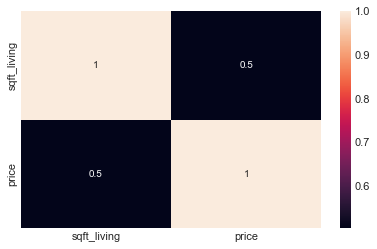

In [11]:
# Calculate the Pearson correlation coefficient
corr, p = stats.pearsonr(data_2['sqft_living'], data_2['price'])

# Calculate a 99% confidence interval for the correlation
ci = np.around(stats.pearsonr(data_2['sqft_living'], data_2['price']), decimals=2)

# Print the results
print("Correlation coefficient: {}".format(corr))
print("Hypothesis test: p = {}".format(p))
print("99% CI for the correlation: ({}, {})".format(ci[0], ci[1]))


df=data_2[['sqft_living','price']]
sns.heatmap(df.corr(),annot=True)
sns.set(rc={'figure.figsize':(4,4)})

if p < 0.05:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

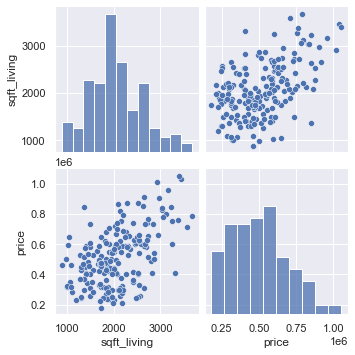

In [12]:
sns.pairplot(df)

In [13]:
x=df.iloc[:, 0].values
y=df.iloc[:,1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,
                                                                    random_state=100)

import statsmodels.api as st
x_train_st = st.add_constant(x_train)
ler= st.OLS(y_train,x_train_st).fit()
ler.params
ler.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     46.49
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.84e-10
Time:                        21:42:40   Log-Likelihood:                -2154.7
No. Observations:                 160   AIC:                             4313.
Df Residuals:                     158   BIC:                             4320.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.77e+05   5.04e+04      3.511      0.001    7.74e+04    2.77e+05
x1           159.8473     23.443      6.818      0.000     113.544     206.150
==============================================================================
Omnibus:                        4.457   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                2.938
Skew:                           0.151   Prob(JB):                        0.230
Kurtosis:                       2.409   Cond. No.                     7.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

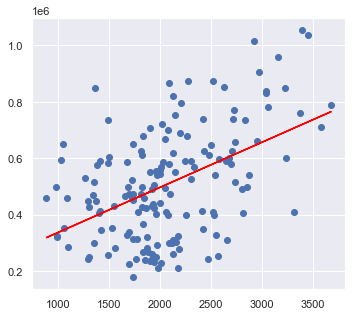

In [14]:
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.scatter(x_train,y_train)
plt.plot(x_train, ler.params[0] + ler.params[1]*x_train,'red')
plt.show()

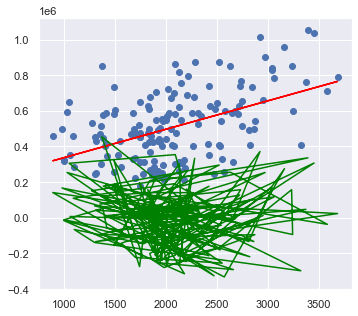

R2 score is:  0.39502097956823234


In [15]:
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.scatter(x_train,y_train)
plt.plot(x_train, ler.params[0] + ler.params[1]*x_train,'red')
plt.plot(x_train, ler.resid, color='green')
plt.show()

x_test_st = st.add_constant(x_test)
y_test_pred= ler.predict(x_test_st)
r2 = skm.r2_score(y_test, y_test_pred)
print('R2 score is: ',r2)

In [16]:
df1=new_data[['sqft_living', 'sqft_above', 'bathrooms','sqft_basement','price']]
x = df1[['sqft_living', 'sqft_above', 'bathrooms','sqft_basement']]
y = df1['price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,
                                                                    random_state=100)

import statsmodels.api as st
x_train_st = st.add_constant(x_train)
ler= st.OLS(y_train,x_train_st).fit()
ler.params
ler.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     173.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           5.16e-94
Time:                        21:42:41   Log-Likelihood:                -16984.
No. Observations:                1262   AIC:                         3.398e+04
Df Residuals:                    1258   BIC:                         3.400e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.449e+05   1.88e+04      7.717      0.000    1.08e+05    1.82e+05
sqft_living      95.0350      6.595     14.411      0.000      82.097     107.973
sqft_above       98.6697      9.779     10.090      0.000      79.484     117.855
bathrooms      1.567e+04   8959.006      1.749      0.080   -1904.177    3.32e+04
sqft_basement    -3.6347     11.588     -0.314      0.754     -26.368      19.099
==============================================================================
Omnibus:                       30.250   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.801
Skew:                           0.381   Prob(JB):                     1.24e-07
Kurtosis:                       3.154   Cond. No.                     2.23e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.88e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h5>The multi regression equation is : Y = 1.26e+05 + 94.7107 * (sqft_living) + 88.5546 * (sqft_above) + 2.701e+04	*(bathrooms) + 6.1561 * (sqft_basement)</h5>

In [17]:
print(ler.rsquared_adj)

0.2906849083077232


not a good fit